# Medellín Chicharron
## Peer-graded Assignment: Battle of Neighbourhoods - Week 1

###### By: Marco Cruz Dawkins


## Part 1 - A description of the problem and a discussion of the background.
### 1.1 Description of the Problem
Andrea thinks there is no specialized chicharron restaurant in Medellin knowing that this city culturally loves this dish because it is the best part of the Bandeja Paisa. But she does not know where would be the best spot for this restaurant having in mind that is a new category of the restaurant in the city.

### 1.2 Discussion of the Background
Andrea family have a unique recipe for this dish that they are willing to share and she also is taking a trip to get trained in Barranquilla, Colombia that has more than 10 specialized chicharron restaurant that works 24/7 so her venture has the best chicharron once it's launched.

### 1.3 Target Audience
 Considering that Medellinenses love to party and after the party eats something greasy before they head home or to continue the party, is time for the city to get their first chicharron restaurant having in mind that they love it, male and female between 10 and 59 years are the perfect range of age to target.

## Part 2 - A description of the data and how it will be used to solve the problem 
 This project will rely on public data from Wikipedia and Foursquare.
 
 ### How data will be used to solve the problem
 The data from the datasets from Wikipedia and Foursquare will be explored by considering the venues within the neighbourhood of Medellin Comunas. These areas' restaurants, bars, offices and hotels would be checked in terms of the amount within a certain mile radius. Due to Foursquare restrictions, the number of venues will be limited to 500 venues.  

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
from sklearn.cluster import KMeans
import folium
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [2]:
List_url = "https://es.wikipedia.org/wiki/Anexo:Barrios_de_Medell%C3%ADn"
source = requests.get(List_url).text

In [3]:
soup = BeautifulSoup(source, 'xml')
#print(soup.prettify())

In [4]:
links= soup.find_all('a')
#links

In [5]:
comunas= []
comuna= soup.get_text()[3677:4074].split("\n")
for string in comuna:
    comunas.append(string[2:])
comuna =[]
for string in comunas:
    string = string.lstrip()
    comuna.append(string)
print(comuna)

['Comuna 1 - Popular', 'Comuna 2 - Santa Cruz', 'Comuna 3 - Manrique', 'Comuna 4 - Aranjuez', 'Comuna 5 - Castilla', 'Comuna 6 - Doce de Octubre', 'Comuna 7 - Robledo', 'Comuna 8 - Villa Hermosa', 'Comuna 9 - Buenos Aires', 'Comuna 10 - La Candelaria', 'Comuna 11 - Laureles-Estadio', 'Comuna 12 - La América', 'Comuna 13 - San Javier', 'Comuna 14 - El Poblado', 'Comuna 15 - Guayabal', 'Comuna 16 - Belén']


In [6]:
df = pd.DataFrame()
df['Comunas'] = comuna
df

,Comunas
0,Comuna 1 - Popular
1,Comuna 2 - Santa Cruz
2,Comuna 3 - Manrique
3,Comuna 4 - Aranjuez
4,Comuna 5 - Castilla
5,Comuna 6 - Doce de Octubre
6,Comuna 7 - Robledo
7,Comuna 8 - Villa Hermosa
8,Comuna 9 - Buenos Aires
9,Comuna 10 - La Candelaria


In [7]:
def get_coords_local(comunas, output_as='center'):
    """
    get the bounding box of a comunuty in WGS84 given its name
    Parameters
    ----------
    localidad : str
        name of the country in english and lowercase
    output_as : 'str
        chose from 'boundingbox' or 'center'. 
         - 'boundingbox' for [latmin, latmax, lonmin, lonmax]
         - 'center' for [latcenter, loncenter]
    Returns
    -------
    output : list
        list with coordinates as str
    """
    # create url
    url = '{0}{1}{2}'.format('http://nominatim.openstreetmap.org/search.php?q=',
                             comunas +', Medellín, Antioquia',
                             '&format=json&polygon=0')
    response = requests.get(url).json()[0]

    # parse response to list
    if output_as == 'boundingbox':
        lst = response[output_as]
        output = [float(i) for i in lst]
    if output_as == 'center':
        lst = [response.get(key) for key in ['lat','lon']]
        output = [float(i) for i in lst]
    return output

In [8]:
df2 = df.copy()

latitudeCln = []
longitudeCln = []
for index, row in df2.iterrows():
    print(row[0])
    lat, long = get_coords_local(comunas=row[0], output_as='center')
    latitudeCln.append(lat)
    longitudeCln.append(long)

df2['Latitude'] = latitudeCln
df2['Longitude'] = longitudeCln

df2.shape

Comuna 1 - Popular
Comuna 2 - Santa Cruz
Comuna 3 - Manrique
Comuna 4 - Aranjuez
Comuna 5 - Castilla
Comuna 6 - Doce de Octubre
Comuna 7 - Robledo
Comuna 8 - Villa Hermosa
Comuna 9 - Buenos Aires
Comuna 10 - La Candelaria
Comuna 11 - Laureles-Estadio
Comuna 12 - La América
Comuna 13 - San Javier
Comuna 14 - El Poblado
Comuna 15 - Guayabal
Comuna 16 - Belén


(16, 3)

In [9]:
df2

,Comunas,Latitude,Longitude
0,Comuna 1 - Popular,6.293344,-75.544825
1,Comuna 2 - Santa Cruz,6.296956,-75.554852
2,Comuna 3 - Manrique,6.275061,-75.545892
3,Comuna 4 - Aranjuez,6.277723,-75.562599
4,Comuna 5 - Castilla,6.293699,-75.568264
5,Comuna 6 - Doce de Octubre,6.297565,-75.577556
6,Comuna 7 - Robledo,6.279074,-75.588767
7,Comuna 8 - Villa Hermosa,6.253104,-75.550897
8,Comuna 9 - Buenos Aires,6.230779,-75.556594
9,Comuna 10 - La Candelaria,6.250102,-75.567915


In [10]:
address = 'Medellín, Colombia'

geolocator = Nominatim(user_agent="MedellínProject")
location = geolocator.geocode(address, timeout=60, exactly_one=True)
latitude = location.latitude
longitude = location.longitude
print('The decimal coordinates of Bogotá are {}, {}.'.format(latitude, longitude))

The decimal coordinates of Bogotá are 6.2443382, -75.573553.


In [11]:
# make a copy of the dataframe to get it simply back if needed
df3 = df2.copy()
df3

,Comunas,Latitude,Longitude
0,Comuna 1 - Popular,6.293344,-75.544825
1,Comuna 2 - Santa Cruz,6.296956,-75.554852
2,Comuna 3 - Manrique,6.275061,-75.545892
3,Comuna 4 - Aranjuez,6.277723,-75.562599
4,Comuna 5 - Castilla,6.293699,-75.568264
5,Comuna 6 - Doce de Octubre,6.297565,-75.577556
6,Comuna 7 - Robledo,6.279074,-75.588767
7,Comuna 8 - Villa Hermosa,6.253104,-75.550897
8,Comuna 9 - Buenos Aires,6.230779,-75.556594
9,Comuna 10 - La Candelaria,6.250102,-75.567915


In [12]:
"""
    create map of Bogotá using latitude and longitude values
"""
map_medellin = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, local in zip(df3['Latitude'], df3['Longitude'], df3['Comunas']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_medellin)  
    
map_medellin

In [13]:
# function to repeat the exploring process to all the neighborhoods in Toronto
import urllib
def getNearbyVenues(names, latitudes, longitudes, radius=5000, categoryIds=''):
    try:
        venues_list=[]
        for name, lat, lng in zip(names, latitudes, longitudes):
            #print(name)

            #create the API request URL
            url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, VERSION, lat, lng, radius, LIMIT)

            if (categoryIds != ''):
                url = url + '&categoryId={}'
                url = url.format(categoryIds)

            # make the GET request
            response = requests.get(url).json()
            results = response["response"]['venues']

            # return only relevant information for each nearby venue
            for v in results:
                success = False
                try:
                    category = v['categories'][0]['name']
                    success = True
                except:
                    pass

                if success:
                    venues_list.append([(
                        name, 
                        lat, 
                        lng, 
                        v['name'], 
                        v['location']['lat'], 
                        v['location']['lng'],
                        v['categories'][0]['name']
                    )])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
        nearby_venues.columns = ['Comunas', 
                  'Comuna Latitude', 
                  'Comuna Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    except:
        print(url)
        print(response)
        print(results)
        print(nearby_venues)

    return(nearby_venues)

In [14]:
LIMIT = 500 # limit of number of venues returned by Foursquare API
radius = 5000 # define radius
CLIENT_ID = 'BLPUDVTPYRE2XYFUPG3CSWLCHCQCTPHZ5RCMJRMYXLIU3EVQ'
CLIENT_SECRET = 'WNBACJ2FR1FSGMMY5MYQ2TFOGTRAVDF0HK53E0D5N3S3XMGF'
VERSION = '20181020'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BLPUDVTPYRE2XYFUPG3CSWLCHCQCTPHZ5RCMJRMYXLIU3EVQ
CLIENT_SECRET:WNBACJ2FR1FSGMMY5MYQ2TFOGTRAVDF0HK53E0D5N3S3XMGF


In [15]:
# Use category id 4d4b7105d754a06374d81259 to only get the food joints
medellin_venues_food = getNearbyVenues(names=df3['Comunas'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=1000, categoryIds='4d4b7105d754a06374d81259')
medellin_venues_food.head()

,Comunas,Comuna Latitude,Comuna Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Comuna 1 - Popular,6.293344,-75.544825,Panederia Pin Ponpan,6.292558,-75.544979,Bakery
1,Comuna 1 - Popular,6.293344,-75.544825,La Mesa del Barrio,6.294749,-75.544043,South American Restaurant
2,Comuna 1 - Popular,6.293344,-75.544825,Panne Cook Gourmet Express,6.294913,-75.544692,Sandwich Place
3,Comuna 1 - Popular,6.293344,-75.544825,Mi Cebi & Chela,6.293481,-75.541798,Caribbean Restaurant
4,Comuna 1 - Popular,6.293344,-75.544825,Brasas De Colombia,6.293375,-75.541909,Colombian Restaurant


In [16]:
medellin_venues_food.shape

(565, 7)

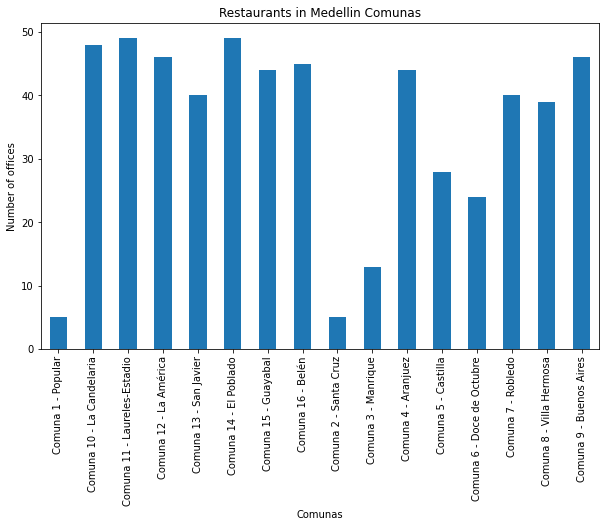

In [40]:
medellin_venues_food_hist = medellin_venues_food.groupby('Comunas').count()['Venue']
medellin_venues_food_hist.plot(kind='bar', figsize=(10, 6))

plt.ylabel('Number of offices') # add y-label
plt.xlabel('Comunas') # add x-label
plt.title('Restaurants in Medellin Comunas') 

plt.show()

In [18]:
def addToMap(df, color, existingMap):
    for lat, lng, local, venue, venueCat in zip(df['Venue Latitude'], df['Venue Longitude'], df['Comunas'], df['Venue'], df['Venue Category']):
        label = '{} ({}) - {}'.format(venue, venueCat, local)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7).add_to(existingMap)

In [19]:
map_medellin_food = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(medellin_venues_food, 'red', map_medellin_food)
map_medellin_food

In [20]:
medellin_venues_office = getNearbyVenues(names=df3['Comunas'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=1000, categoryIds='4d4b7105d754a06375d81259')
medellin_venues_office.head()

,Comunas,Comuna Latitude,Comuna Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Comuna 1 - Popular,6.293344,-75.544825,Biblioteca España,6.294660,-75.543920,Library
1,Comuna 1 - Popular,6.293344,-75.544825,Álamos II,6.293512,-75.542793,Building
2,Comuna 1 - Popular,6.293344,-75.544825,Biblioteca Popular Nro 2,6.302178,-75.547168,Library
3,Comuna 1 - Popular,6.293344,-75.544825,Institución Educativa Reino de Bélgica,6.284620,-75.540205,High School
4,Comuna 1 - Popular,6.293344,-75.544825,Biblioteca granizal,6.292352,-75.544895,Library


In [21]:
medellin_venues_office.shape

(610, 7)

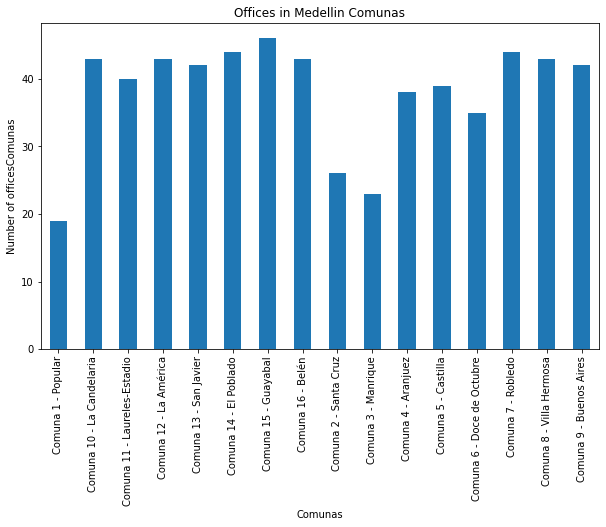

In [38]:
medellin_venues_office_hist = medellin_venues_office.groupby('Comunas').count()['Venue']
medellin_venues_office_hist.plot(kind='bar', figsize=(10, 6))

plt.ylabel('Number of officesComunas') # add y-label
plt.xlabel('Comunas') # add x-label
plt.title('Offices in Medellin Comunas') 

plt.show()

In [23]:
map_medellin_office = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(medellin_venues_office, 'fuchsia', map_medellin_office)
map_medellin_office

In [24]:
medellin_venues_nlife = getNearbyVenues(names=df3['Comunas'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=1000, categoryIds='4d4b7105d754a06376d81259')
medellin_venues_nlife.head()

,Comunas,Comuna Latitude,Comuna Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Comuna 1 - Popular,6.293344,-75.544825,Xclusive club Medellin (Ant),6.297070,-75.547472,Bar
1,Comuna 1 - Popular,6.293344,-75.544825,Mirador Somos Todos Bar,6.294684,-75.544868,Bar
2,Comuna 1 - Popular,6.293344,-75.544825,Lemon's Shots,6.294025,-75.543264,Bar
3,Comuna 1 - Popular,6.293344,-75.544825,Guaguando Salsabar,6.289896,-75.545891,Bar
4,Comuna 1 - Popular,6.293344,-75.544825,Blayze - Club,6.296811,-75.553044,Nightclub


In [25]:
medellin_venues_nlife.shape

(376, 7)

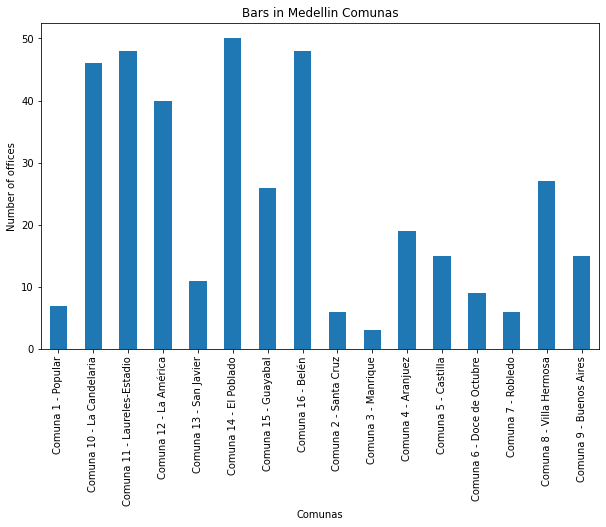

In [39]:
medellin_venues_nlife_hist = medellin_venues_nlife.groupby('Comunas').count()['Venue']
medellin_venues_nlife_hist.plot(kind='bar', figsize=(10, 6))

plt.ylabel('Number of offices') # add y-label
plt.xlabel('Comunas') # add x-label
plt.title('Bars in Medellin Comunas') 

plt.show()

In [27]:
map_medellin_nlife = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(medellin_venues_nlife, 'gold', map_medellin_nlife)
map_medellin_nlife

In [28]:
medellin_venues_hotels = getNearbyVenues(names=df3['Comunas'], latitudes=df3['Latitude'], longitudes=df3['Longitude'], radius=1000, categoryIds='4bf58dd8d48988d1fa931735')
medellin_venues_hotels.head()

,Comunas,Comuna Latitude,Comuna Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Comuna 4 - Aranjuez,6.277723,-75.562599,Motel Jardín del Amor,6.269065,-75.561693,Hotel
1,Comuna 4 - Aranjuez,6.277723,-75.562599,Portal Del Rodeo Hotel Medellin,6.285166,-75.566615,Hotel
2,Comuna 4 - Aranjuez,6.277723,-75.562599,Hotel La Terminal Caribe,6.279713,-75.570290,Hotel
3,Comuna 5 - Castilla,6.293699,-75.568264,Portal Del Rodeo Hotel Medellin,6.285166,-75.566615,Hotel
4,Comuna 7 - Robledo,6.279074,-75.588767,Club Hornachuelos,6.278764,-75.592167,Hotel


In [29]:
medellin_venues_hotels.shape

(150, 7)

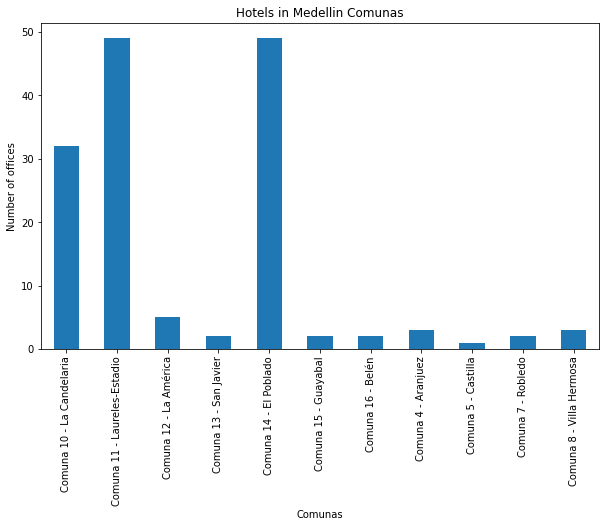

In [49]:
medellin_venues_hotels_hist = medellin_venues_hotels.groupby('Comunas').count()['Venue']
medellin_venues_hotels_hist.plot(kind='bar', figsize=(10, 6))

plt.ylabel('Number of offices') # add y-label
plt.xlabel('Comunas') # add x-label
plt.title('Hotels in Medellin Comunas') 

plt.show()

In [31]:
map_medellin_hotels = folium.Map(location=[latitude, longitude], zoom_start=12)
addToMap(medellin_venues_hotels, 'green', map_medellin_hotels)
map_medellin_hotels

In [32]:
def addColumn(startDf, columnTitle, dataDf):
    grouped = dataDf.groupby('Comunas').count()
    
    for n in startDf['Comunas']:
        try:
            startDf.loc[startDf['Comunas'] == n,columnTitle] = grouped.loc[n, 'Venue']
        except:
            startDf.loc[startDf['Comunas'] == n,columnTitle] = 0

In [33]:
df_data = df3.copy()
addColumn(df_data, 'Food', medellin_venues_food)
addColumn(df_data, 'Offices', medellin_venues_office)
addColumn(df_data, 'Nightlife Spot', medellin_venues_nlife)
addColumn(df_data, 'Hotels', medellin_venues_hotels)
df_data.rename(columns={'Comunas':'Comuna'}, inplace=True)
df_data

,Comuna,Latitude,Longitude,Food,Offices,Nightlife Spot,Hotels
0,Comuna 1 - Popular,6.293344,-75.544825,5.0,19.0,7.0,0.0
1,Comuna 2 - Santa Cruz,6.296956,-75.554852,5.0,26.0,6.0,0.0
2,Comuna 3 - Manrique,6.275061,-75.545892,13.0,23.0,3.0,0.0
3,Comuna 4 - Aranjuez,6.277723,-75.562599,44.0,38.0,19.0,3.0
4,Comuna 5 - Castilla,6.293699,-75.568264,28.0,39.0,15.0,1.0
5,Comuna 6 - Doce de Octubre,6.297565,-75.577556,24.0,35.0,9.0,0.0
6,Comuna 7 - Robledo,6.279074,-75.588767,40.0,44.0,6.0,2.0
7,Comuna 8 - Villa Hermosa,6.253104,-75.550897,39.0,43.0,27.0,3.0
8,Comuna 9 - Buenos Aires,6.230779,-75.556594,46.0,42.0,15.0,0.0
9,Comuna 10 - La Candelaria,6.250102,-75.567915,48.0,43.0,46.0,32.0


In [42]:
# possitive weight, because Andrea wants to open a Chicharron joint and thus wants as much traffic as possible
weight_food = 0.1

# positive weight because employees are even better customers
weight_offices = 0.25

# positive weight because drunk pleople are the best customers for greasy food
weight_nlife = 0.4

# positive weight because tourist always want to taste a cultural dish and a lot like to party
weight_hotels = 0.35

In [43]:
df_weighted = df_data[['Comuna']].copy()

In [44]:
df_weighted['Score'] = df_data['Food'] * weight_food + df_data['Offices'] * weight_offices + df_data['Nightlife Spot'] * weight_nlife + df_data['Hotels'] * weight_hotels
df_weighted = df_weighted.sort_values(by=['Score'], ascending=False)
df_weighted

,Comuna,Score
13,Comuna 14 - El Poblado,53.05
10,Comuna 11 - Laureles-Estadio,51.25
9,Comuna 10 - La Candelaria,45.15
15,Comuna 16 - Belén,35.15
11,Comuna 12 - La América,33.10
14,Comuna 15 - Guayabal,27.00
7,Comuna 8 - Villa Hermosa,26.50
3,Comuna 4 - Aranjuez,22.55
8,Comuna 9 - Buenos Aires,21.10
12,Comuna 13 - San Javier,19.60


In [45]:
map_med_result = folium.Map(location=[latitude, longitude], zoom_start=13)

med_win = df3[df3['Comunas'] == 'Comuna 14 - El Poblado']

for lat, lng, local in zip(med_win['Latitude'], med_win['Longitude'], med_win['Comunas']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_med_result) 

addToMap(medellin_venues_food[medellin_venues_food['Comunas'] == 'Comuna 14 - El Poblado'], 'red', map_med_result)
addToMap(medellin_venues_nlife[medellin_venues_nlife['Comunas'] == 'Comuna 14 - El Poblado'], 'gold', map_med_result)
addToMap(medellin_venues_office[medellin_venues_office['Comunas'] == 'Comuna 14 - El Poblado'], 'fuchsia', map_med_result)
addToMap(medellin_venues_hotels[medellin_venues_hotels['Comunas'] == 'Comuna 14 - El Poblado'], 'green', map_med_result)

map_med_result

In [48]:
map_med_result1 = folium.Map(location=[latitude, longitude], zoom_start=13)

med_win2 = df3[df3['Comunas'] == 'Comuna 11 - Laureles-Estadio']

for lat, lng, local in zip(med_win2['Latitude'], med_win2['Longitude'], med_win2['Comunas']):
    label = '{}'.format(local)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7).add_to(map_med_result1) 

addToMap(medellin_venues_food[medellin_venues_food['Comunas'] == 'Comuna 11 - Laureles-Estadio'], 'red', map_med_result1)
addToMap(medellin_venues_nlife[medellin_venues_nlife['Comunas'] == 'Comuna 11 - Laureles-Estadio'], 'gold', map_med_result1)
addToMap(medellin_venues_office[medellin_venues_office['Comunas'] == 'Comuna 11 - Laureles-Estadio'], 'fuchsia', map_med_result1)
addToMap(medellin_venues_hotels[medellin_venues_hotels['Comunas'] == 'Comuna 11 - Laureles-Estadio'], 'green', map_med_result1)

map_med_result1